In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Data Collection

In [4]:
df = pd.read_csv("ifood_df.csv")
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


### Data Exploration and Cleaning

In [33]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [10]:
print(df.isnull().sum()) 

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [12]:
print(df.nunique())

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

In [19]:
df_clean = df.dropna()

In [25]:
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

Duplicate rows: 184


In [27]:
df_clean = df.drop_duplicates()

### Descriptive Statistics

In [36]:
average_purchase_value = df['Income'].mean()
print(f"Average Purchase Value: ${average_purchase_value:.2f}")

Average Purchase Value: $51622.09


In [38]:
total_purchase_value = df['MntTotal'].sum()
print(f"Total Purchase Value: ${total_purchase_value:.2f}")

Total Purchase Value: $1240896.00


In [44]:
purchases_per_customer = df.groupby("Kidhome")['Income'].count()
print("Purchase Frequency per Customer:\n", purchases_per_customer.head())

Purchase Frequency per Customer:
 Kidhome
0    1276
1     883
2      46
Name: Income, dtype: int64


### Customer Segmentation

In [71]:
customer_data = pd.DataFrame({
    'Total_Spent': total_purchase_value,
    'Frequency': purchases_per_customer
    })

In [73]:
print(customer_data.head())

         Total_Spent  Frequency
Kidhome                        
0            1240896       1276
1            1240896        883
2            1240896         46


In [75]:
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data)

In [77]:
print(customer_data_scaled[:5])

[[ 0.          1.05471516]
 [ 0.          0.28853576]
 [ 0.         -1.34325092]]


In [83]:
kmeans = KMeans(n_clusters=2, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [85]:
print(customer_data.head())

         Total_Spent  Frequency  Cluster
Kidhome                                 
0            1240896       1276        0
1            1240896        883        0
2            1240896         46        1


### Visualization

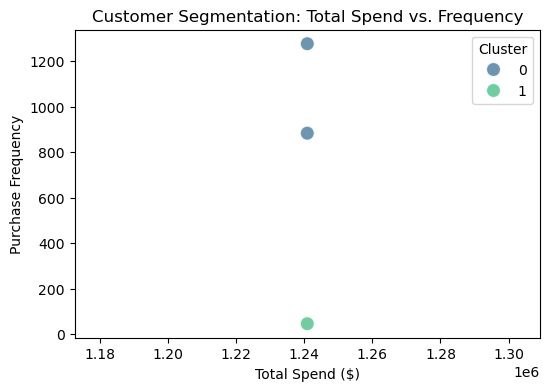

In [94]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=customer_data, x='Total_Spent', y='Frequency', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title("Customer Segmentation: Total Spend vs. Frequency")
plt.xlabel("Total Spend ($)")
plt.ylabel("Purchase Frequency")
plt.legend(title="Cluster", loc='upper right')
plt.show()

In [100]:
cluster_summary = customer_data.groupby('Cluster').mean()

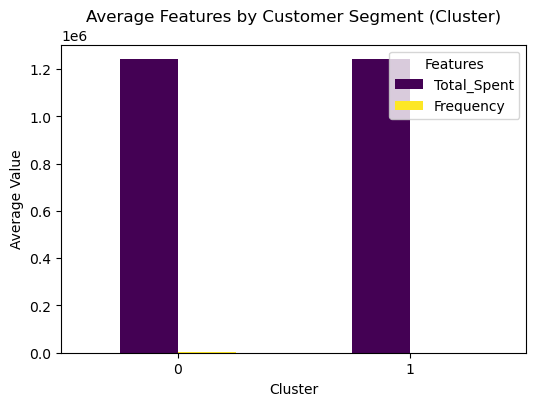

In [104]:
cluster_summary.plot(kind='bar', figsize=(6, 4), colormap='viridis')
plt.title("Average Features by Customer Segment (Cluster)")
plt.xlabel("Cluster")
plt.ylabel("Average Value")
plt.xticks(rotation=0)
plt.legend(title="Features", loc='upper right')
plt.show()

### Insights and Recommendations

#### Step 1: Analyze the Average Characteristics of Each Cluster

##### Assuming you have already created customer segments (clusters) using K-means, we can begin by analyzing the average values of Total Spend, Purchase Frequency for each cluster.

#### Step 2: Interpreting the Segments

##### Cluster 0: High Spend, High Frequency

#### Recommendations

##### Loyalty Programs: Offer rewards or loyalty programs to retain these high-value customers. This could include discounts, early access to sales, or exclusive offers.
##### Personalized Marketing: Send personalized recommendations or targeted promotions based on their purchase history.
##### VIP Treatment: Consider offering a VIP program or special recognition to enhance their engagement and ensure they stay loyal.

#### Step 3: Monitoring and Iteration

##### Customer behavior changes over time, so it’s crucial to regularly monitor the performance of each segment and iterate on your marketing strategies. Track key metrics such as:

##### Customer Lifetime Value (CLV)
##### Repeat purchase rate
##### Customer satisfaction (via NPS scores or surveys)
##### Churn rate

#### Conclusion

##### By understanding the distinct characteristics of each customer segment, you can develop tailored marketing strategies that address the unique needs and behaviors of each group. This targeted approach helps maximize the value of your customer base, improve retention, and ultimately drive higher revenues.